In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_train_validation = pd.read_csv('m5_data/sales_train_validation.csv')

In [4]:
next_28_days = [f'd_{i}' for i in range(345, 372)] 

In [5]:
# Compute total sales for each item-store combination over first 28 days
sales_next_28 = sales_train_validation[['item_id', 'store_id', 'state_id'] + next_28_days]
sales_next_28['total_sales'] = sales_next_28[next_28_days].sum(axis=1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3300\672382955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_next_28['total_sales'] = sales_next_28[next_28_days].sum(axis=1)


In [6]:
# Filter for non-zero sales
active_next_sales = sales_next_28[sales_next_28['total_sales'] > 0]

In [7]:
# Extract unique items, stores, and states
unique_items  = active_next_sales['item_id'].unique()
unique_stores = active_next_sales['store_id'].unique()
unique_states = active_next_sales['state_id'].unique()

In [8]:
subset_sales_data = sales_next_28.copy()

In [9]:
# Print results
print(f"Number of items with sales in next 28 days: {len(unique_items)}")
print(f"Items: {list(unique_items)}")
print(f"\nNumber of stores with sales in next 28 days: {len(unique_stores)}")
print(f"Stores: {list(unique_stores)}")
print(f"\nNumber of states with sales in next 28 days: {len(unique_states)}")
print(f"States: {list(unique_states)}")

Number of items with sales in next 28 days: 1852
Items: ['HOBBIES_1_002', 'HOBBIES_1_004', 'HOBBIES_1_005', 'HOBBIES_1_008', 'HOBBIES_1_009', 'HOBBIES_1_010', 'HOBBIES_1_012', 'HOBBIES_1_014', 'HOBBIES_1_015', 'HOBBIES_1_016', 'HOBBIES_1_017', 'HOBBIES_1_020', 'HOBBIES_1_022', 'HOBBIES_1_023', 'HOBBIES_1_025', 'HOBBIES_1_028', 'HOBBIES_1_029', 'HOBBIES_1_031', 'HOBBIES_1_032', 'HOBBIES_1_034', 'HOBBIES_1_035', 'HOBBIES_1_036', 'HOBBIES_1_038', 'HOBBIES_1_041', 'HOBBIES_1_042', 'HOBBIES_1_043', 'HOBBIES_1_044', 'HOBBIES_1_047', 'HOBBIES_1_048', 'HOBBIES_1_049', 'HOBBIES_1_050', 'HOBBIES_1_055', 'HOBBIES_1_058', 'HOBBIES_1_061', 'HOBBIES_1_063', 'HOBBIES_1_064', 'HOBBIES_1_067', 'HOBBIES_1_068', 'HOBBIES_1_069', 'HOBBIES_1_072', 'HOBBIES_1_073', 'HOBBIES_1_075', 'HOBBIES_1_076', 'HOBBIES_1_078', 'HOBBIES_1_079', 'HOBBIES_1_080', 'HOBBIES_1_082', 'HOBBIES_1_084', 'HOBBIES_1_086', 'HOBBIES_1_088', 'HOBBIES_1_089', 'HOBBIES_1_092', 'HOBBIES_1_094', 'HOBBIES_1_097', 'HOBBIES_1_098', 'HOBBIES

In [10]:
#item level
item_forecasts = []
for item in unique_items:
    series = subset_sales_data[subset_sales_data['item_id'] == item][next_28_days].sum().values
    try:
        model = ARIMA(series, order=(1,1,1)).fit()
        forecast = model.forecast(steps=28).mean()
    except:
        forecast = series[-28:].mean()  # Fallback to mean if ARIMA fails
    item_forecasts.append({'item_id': item, 'forecast': forecast})
item_forecasts = pd.DataFrame(item_forecasts)
print("Item-level forecasts (first 10 rows):")
print(item_forecasts.head(10))

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmode

Item-level forecasts (first 10 rows):
         item_id   forecast
0  HOBBIES_1_002   2.721798
1  HOBBIES_1_004  20.480133
2  HOBBIES_1_005  11.582231
3  HOBBIES_1_008  62.908291
4  HOBBIES_1_009   8.346704
5  HOBBIES_1_010   6.009257
6  HOBBIES_1_012   4.905890
7  HOBBIES_1_014  10.962663
8  HOBBIES_1_015  40.456803
9  HOBBIES_1_016  27.502220


In [11]:
#store level
store_forecasts = []
for store in unique_stores:
    series = subset_sales_data[subset_sales_data['store_id'] == store][next_28_days].sum().values
    try:
        model = ARIMA(series, order=(1,1,1)).fit()
        forecast = model.forecast(steps=28).mean()
    except:
        forecast = series[-28:].mean()
    store_forecasts.append({'store_id': store, 'forecast': forecast})
store_forecasts = pd.DataFrame(store_forecasts)
print("\nStore-level forecasts (first 10 rows):")
print(store_forecasts.head(10))

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'



Store-level forecasts (first 10 rows):
  store_id     forecast
0     CA_1  4232.654329
1     CA_2  2499.955712
2     CA_3  5186.677224
3     CA_4  1944.048018
4     TX_1  2481.938629
5     TX_2  3462.167145
6     TX_3  2619.813566
7     WI_1  1668.417836
8     WI_2  1918.835982
9     WI_3  3740.780803


In [12]:
#state level
state_forecasts = []
for state in unique_states:
    series = subset_sales_data[subset_sales_data['state_id'] == state][next_28_days].sum().values
    try:
        model = ARIMA(series, order=(1,1,1)).fit()
        forecast = model.forecast(steps=28).mean()
    except:
        forecast = series[-28:].mean()
    state_forecasts.append({'state_id': state, 'forecast': forecast})
state_forecasts = pd.DataFrame(state_forecasts)
print("\nState-level forecasts:")
print(state_forecasts)


State-level forecasts:
  state_id      forecast
0       CA  13102.681060
1       TX   8332.448575
2       WI   7155.943409


In [13]:
#total sales forecast
total_series = subset_sales_data[next_28_days].sum().values
try:
    total_model = ARIMA(total_series, order=(1,1,1)).fit()
    total_forecast = total_model.forecast(steps=28).mean()
except:
    total_forecast = total_series[-28:].mean()
total_forecast = pd.DataFrame({'level': ['total'], 'forecast': [total_forecast]})
print("\nTotal forecast:")
print(total_forecast)


Total forecast:
   level      forecast
0  total  30806.080168


In [14]:
# Verify data
print("Sales next 28 Days Columns:", sales_next_28.columns.tolist())
print("Active next Sales Shape:", active_next_sales.shape)
print("Total Sales Sum:", active_next_sales['total_sales'].sum())

Sales next 28 Days Columns: ['item_id', 'store_id', 'state_id', 'd_345', 'd_346', 'd_347', 'd_348', 'd_349', 'd_350', 'd_351', 'd_352', 'd_353', 'd_354', 'd_355', 'd_356', 'd_357', 'd_358', 'd_359', 'd_360', 'd_361', 'd_362', 'd_363', 'd_364', 'd_365', 'd_366', 'd_367', 'd_368', 'd_369', 'd_370', 'd_371', 'total_sales']
Active next Sales Shape: (15447, 31)
Total Sales Sum: 781466


In [15]:
# Compute base forecasts (mean sales over first 28 days)
# Item-level forecasts (for active items)
next_item_forecasts = active_next_sales.groupby('item_id')[next_28_days].mean().mean(axis=1).reset_index()
next_item_forecasts.columns = ['item_id', 'forecast']


In [16]:
# Store-level forecasts
store_forecasts = active_next_sales.groupby('store_id')[next_28_days].mean().mean(axis=1).reset_index()
store_forecasts.columns = ['store_id', 'forecast']

In [17]:
# State-level forecasts
state_forecasts = active_next_sales.groupby('state_id')[next_28_days].mean().mean(axis=1).reset_index()
state_forecasts.columns = ['state_id', 'forecast']

In [18]:
# Total sales forecast
total_forecast = active_next_sales[next_28_days].mean().mean()
total_forecast = pd.DataFrame({'level': ['total'], 'forecast': [total_forecast]})

In [19]:
# Build the hierarchy and summing matrix (S)
items = active_next_sales['item_id'].unique()
stores = active_next_sales['store_id'].unique()
states = active_next_sales['state_id'].unique()

In [20]:
# Mapping of items to stores and states
item_to_store = active_next_sales[['item_id', 'store_id']].drop_duplicates().set_index('item_id')['store_id']
item_to_state = active_next_sales[['item_id', 'state_id']].drop_duplicates().set_index('item_id')['state_id']
store_to_state = active_next_sales[['store_id', 'state_id']].drop_duplicates().set_index('store_id')['state_id']

In [21]:
# Number of nodes at each level
n_items = len(items)
n_stores = len(stores)
n_states = len(states)
n_total = 1
n_bottom = n_items
n_total_nodes = n_total + n_states + n_stores + n_items

In [22]:
# Create the summing matrix (S)
# Rows: total, states, stores, items
# Columns: items (bottom level)
S = np.zeros((n_total_nodes, n_bottom))

In [23]:
# Index mapping
item_idx = {item: i for i, item in enumerate(items)}
store_idx = {store: i + n_total + n_states for i, store in enumerate(stores)}
state_idx = {state: i + n_total for i, state in enumerate(states)}
total_idx = 0

In [24]:
# Fill the summing matrix
# Total level (sums all items)
S[total_idx, :] = 1

In [25]:
# State level
for item in items:
    state = item_to_state.loc[item]
    if isinstance(state, pd.Series):
        state = state.iloc[0]
    S[state_idx[state], item_idx[item]] = 1

In [26]:
# Store level
for item in items:
    store = item_to_store.loc[item]
    if isinstance(store, pd.Series):
        store = store.iloc[0]
    S[store_idx[store], item_idx[item]] = 1

In [27]:
# Item level (identity matrix at the bottom)
for i in range(n_items):
    S[n_total + n_states + n_stores + i, i] = 1

In [28]:
# Item level (identity matrix at the bottom)
for i in range(n_items):
    S[n_total + n_states + n_stores + i, i] = 1

In [29]:
# Initialize base_forecasts
base_forecasts = np.zeros(n_total_nodes)

# Populate base forecasts
base_forecasts[total_idx] = total_forecast['forecast'].values[0]
for state in states:
    base_forecasts[state_idx[state]] = state_forecasts[state_forecasts['state_id'] == state]['forecast'].values[0]
for store in stores:
    base_forecasts[store_idx[store]] = store_forecasts[store_forecasts['store_id'] == store]['forecast'].values[0]
for item in items:
    if item in item_forecasts['item_id'].values:
        base_forecasts[n_total + n_states + n_stores + item_idx[item]] = item_forecasts[item_forecasts['item_id'] == item]['forecast'].values[0]
    else:
        base_forecasts[n_total + n_states + n_stores + item_idx[item]] = 0

In [30]:
# Collect base forecasts in a vector
# Order: total, states, stores, items
base_forecasts = np.zeros(n_total_nodes)
base_forecasts[total_idx] = total_forecast['forecast'].values[0]
for state in states:
    base_forecasts[state_idx[state]] = state_forecasts[state_forecasts['state_id'] == state]['forecast'].values[0]
for store in stores:
    base_forecasts[store_idx[store]] = store_forecasts[store_forecasts['store_id'] == store]['forecast'].values[0]
for item in items:
    if item in item_forecasts['item_id'].values:
        base_forecasts[n_total + n_states + n_stores + item_idx[item]] = next_item_forecasts[next_item_forecasts['item_id'] == item]['forecast'].values[0]
    else:
        base_forecasts[n_total + n_states + n_stores + item_idx[item]] = 0


In [31]:
# Bottom-Up (BU) Reconciliation
# Sum item-level forecasts to higher levels
bu_forecasts = np.dot(S, base_forecasts[n_total + n_states + n_stores:])

In [32]:
# MinT (Minimum Trace) Reconciliation
# Simplified MinT: OLS approximation
G = np.linalg.pinv(S.T @ S) @ S.T
reconciled_forecasts = np.dot(S, G @ base_forecasts)

In [33]:
# Organize reconciled forecasts
reconciled_df = pd.DataFrame({
    'level': ['total'] + list(states) + list(stores) + list(items),
    'base_forecast': base_forecasts,
    'bu_forecast': bu_forecasts,
    'mint_forecast': reconciled_forecasts
})

In [34]:
# Display results
print("Reconciled Forecasts (First 20 rows):")
print(reconciled_df.head(20))
print("\nSummary of Differences:")
print("Total Base Forecast:", reconciled_df[reconciled_df['level'] == 'total']['base_forecast'].values[0])
print("Total Bottom-Up Forecast:", reconciled_df[reconciled_df['level'] == 'total']['bu_forecast'].values[0])
print("Total MinT Forecast:", reconciled_df[reconciled_df['level'] == 'total']['mint_forecast'].values[0])

Reconciled Forecasts (First 20 rows):
            level  base_forecast  bu_forecast  mint_forecast
0           total       1.873709  3225.460288       4.761734
1              CA       2.071475  3161.179424       1.800802
2              TX       1.745785    38.027778       0.872006
3              WI       1.726942    26.253086       2.088925
4            CA_1       2.058147  3053.909612       1.281946
5            CA_2       1.780897    63.728101      -0.067829
6            CA_3       3.113014    38.813316       1.205248
7            CA_4       1.234938     4.728395      -0.618563
8            TX_1       1.495840    34.546296       0.544161
9            TX_2       2.054997     3.370370       0.516411
10           TX_3       1.675843     0.111111      -0.188565
11           WI_1       1.290480    12.975309       1.027439
12           WI_2       1.477254    10.425926       1.276916
13           WI_3       2.267758     2.851852      -0.215430
14  HOBBIES_1_002       0.222222     0.222222  


Total Sales per Day (d_345 to d_372):
[36722, 28206, 26640, 29044, 24715, 29463, 36815, 36459, 30548, 22187, 25348, 24034, 27204, 38578, 32587, 24702, 23549, 22408, 23237, 27199, 34362, 33577, 25188, 25124, 29851, 28615, 35104]

State Sales (Total over 28 days):
  state_id  total_sales
0       CA       353029
1       TX       231203
2       WI       197234

Store Sales (Total over 28 days):
  store_id  total_sales
0     CA_1        92135
1     CA_2        67943
2     CA_3       140702
3     CA_4        52249
4     TX_1        66882
5     TX_2        93825
6     TX_3        70496
7     WI_1        45261
8     WI_2        51373
9     WI_3       100600

Top 10 Items Sales (Total over 28 days):
         item_id  total_sales
436  FOODS_3_090        22528
764  FOODS_3_586        12130
765  FOODS_3_587         6978
741  FOODS_3_555         6728
593  FOODS_3_318         5759
547  FOODS_3_252         5605
366  FOODS_2_360         5567
844  FOODS_3_723         5460
143  FOODS_1_218         5269

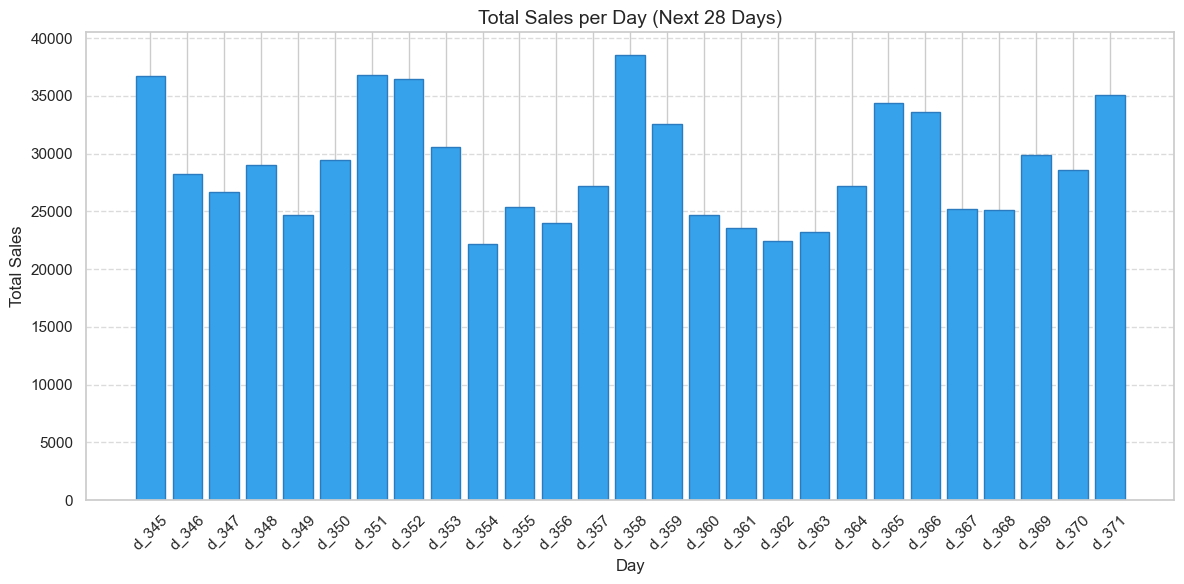

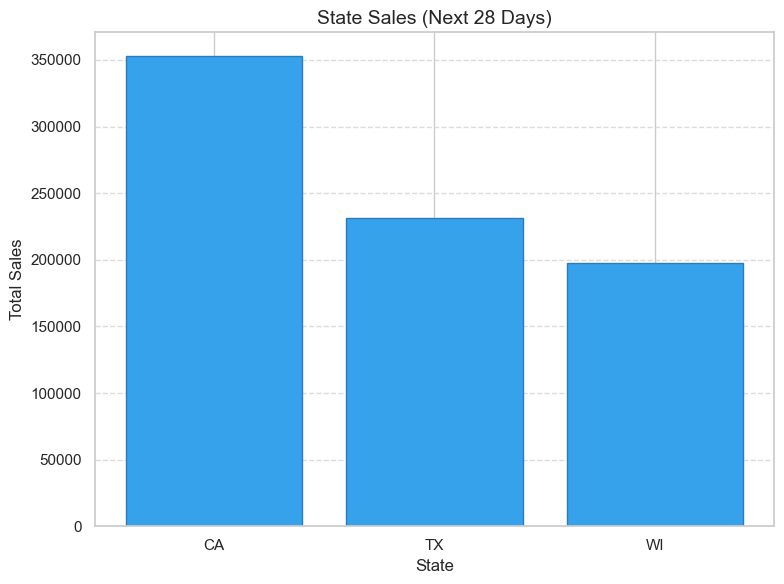

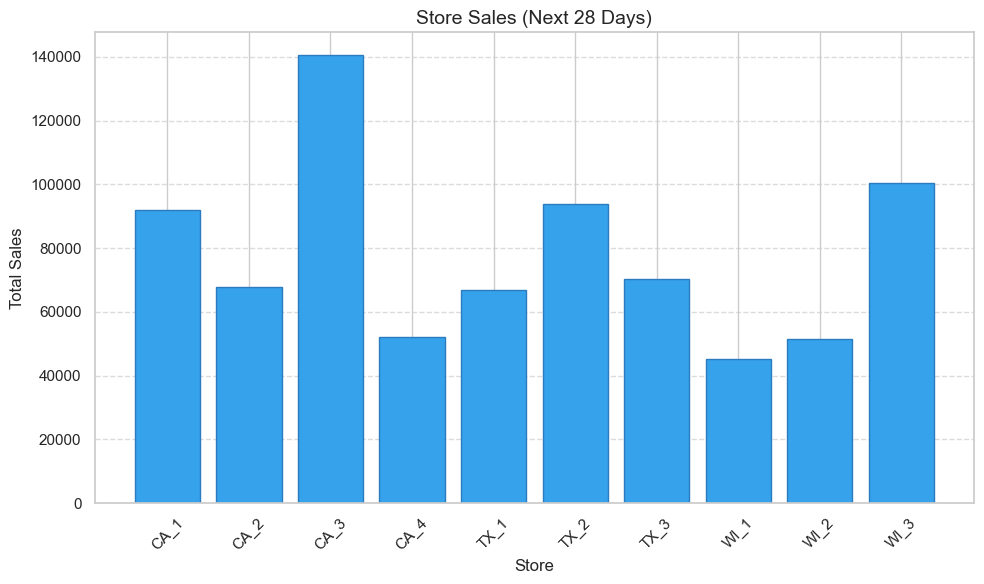

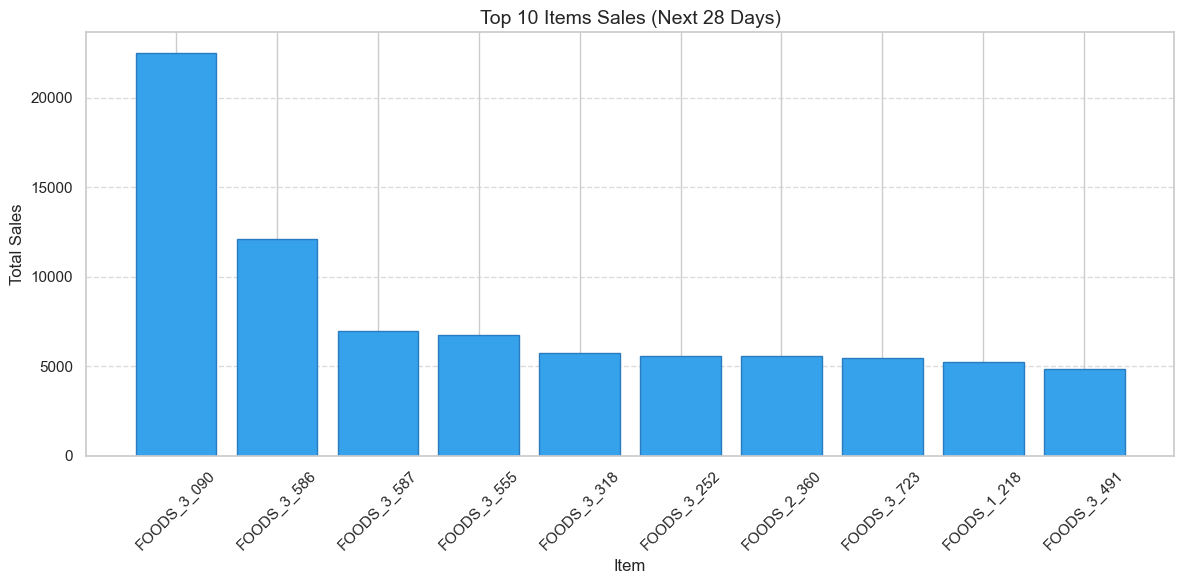

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Matplotlib displays plots inline in Jupyter
%matplotlib inline

# Define the days for the first 28 days
next_28_days = [f'd_{i}' for i in range(345, 372)] 

# 1. Extract sales data for visualizations
# Total sales per day
total_sales_per_day = active_next_sales[next_28_days].sum()

# State sales (total over 28 days per state)
state_sales = active_next_sales.groupby('state_id')[next_28_days].sum().sum(axis=1).reset_index()
state_sales.columns = ['state_id', 'total_sales']

# Store sales (total over 28 days per store)
store_sales = active_next_sales.groupby('store_id')[next_28_days].sum().sum(axis=1).reset_index()
store_sales.columns = ['store_id', 'total_sales']

# Top 10 items by total sales
item_sales = active_next_sales.groupby('item_id')[next_28_days].sum().sum(axis=1).reset_index()
item_sales.columns = ['item_id', 'total_sales']
top_10_items = item_sales.nlargest(10, 'total_sales')

# Print extracted data for verification
print("\nTotal Sales per Day (d_345 to d_372):")
print(total_sales_per_day.tolist())
print("\nState Sales (Total over 28 days):")
print(state_sales)
print("\nStore Sales (Total over 28 days):")
print(store_sales)
print("\nTop 10 Items Sales (Total over 28 days):")
print(top_10_items)

# 2. Create visualizations using Matplotlib

# Set plot style for better aesthetics
import seaborn as sns
sns.set(style="whitegrid")  # Apply Seaborn style


# Visualization 1: Total Sales per Day
plt.figure(figsize=(12, 6))
plt.bar(next_28_days, total_sales_per_day, color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Total Sales per Day (Next 28 Days)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('total_sales_per_day.png')
plt.show()

# Visualization 2: State Sales
plt.figure(figsize=(8, 6))
plt.bar(state_sales['state_id'], state_sales['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('State Sales (Next 28 Days)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('state_next_sales.png')
plt.show()

# Visualization 3: Store Sales
plt.figure(figsize=(10, 6))
plt.bar(store_sales['store_id'], store_sales['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Store Sales (Next 28 Days)', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('store_next_sales.png')
plt.show()

# Visualization 4: Top 10 Items Sales
plt.figure(figsize=(12, 6))
plt.bar(top_10_items['item_id'], top_10_items['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Top 10 Items Sales (Next 28 Days)', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_items_sales.png')
plt.show()

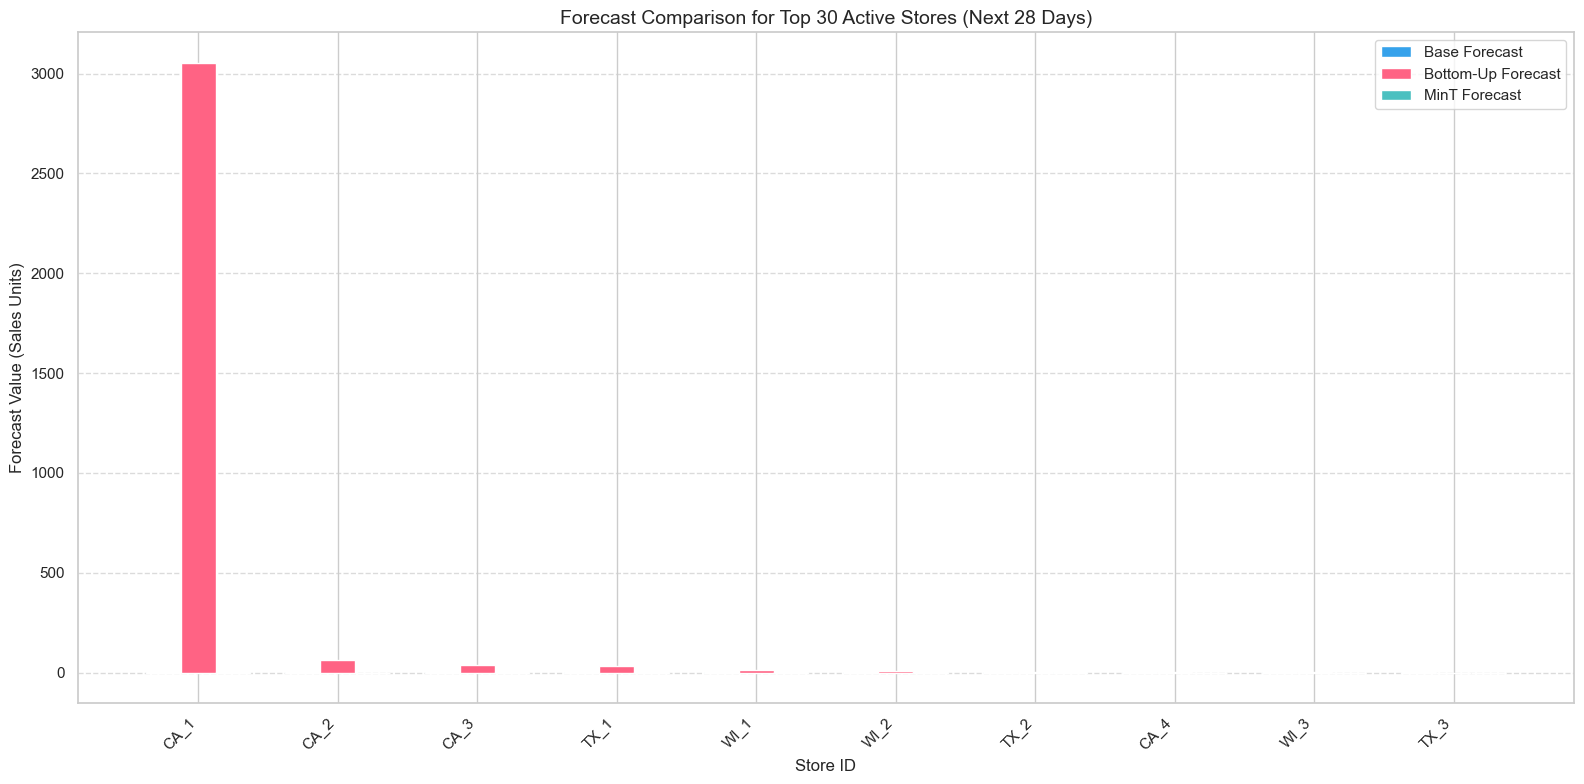

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for stores only
store_df = reconciled_df[reconciled_df['level'].str.startswith(('CA_', 'TX_', 'WI_'))].copy()

# Compute average forecast and get top 30 stores
store_df['avg_forecast'] = store_df[['base_forecast', 'bu_forecast', 'mint_forecast']].mean(axis=1)
top_stores = store_df.sort_values(by='avg_forecast', ascending=False).head(30)

# Plot settings
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.25
index = np.arange(len(top_stores))

# Plot grouped bars
ax.bar(index, top_stores['base_forecast'], bar_width, label='Base Forecast', color='#36A2EB')
ax.bar(index + bar_width, top_stores['bu_forecast'], bar_width, label='Bottom-Up Forecast', color='#FF6384')
ax.bar(index + 2 * bar_width, top_stores['mint_forecast'], bar_width, label='MinT Forecast', color='#4BC0C0')

# Customize
ax.set_xlabel('Store ID', fontsize=12)
ax.set_ylabel('Forecast Value (Sales Units)', fontsize=12)
ax.set_title('Forecast Comparison for Top 30 Active Stores (Next 28 Days)', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(top_stores['level'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 3. XGBoost Forecasting at Item Level
def prepare_features(df, day_cols):
    features = []
    for index, row in df.iterrows():
        item_sales = row[day_cols].values
        item_id = row['item_id']
        store_id = row['store_id']
        days = np.array([int(col.split('_')[1]) for col in day_cols])
        for i in range(len(day_cols)):
            lag_1 = item_sales[i-1] if i > 0 else 0
            lag_2 = item_sales[i-2] if i > 1 else 0
            ma_7 = np.mean(item_sales[max(0, i-7):i]) if i > 0 else 0
            day_num = days[i]
            features.append({
                'item_id': item_id,
                'store_id': store_id,
                'day': day_num,
                'lag_1': lag_1,
                'lag_2': lag_2,
                'ma_7': ma_7,
                'sales': item_sales[i]
            })
    return pd.DataFrame(features)

# Prepare training data
train_data = prepare_features(active_next_sales, next_28_days)

# Split features and target
X = train_data[['lag_1', 'lag_2', 'ma_7', 'day']]
y = train_data['sales']

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X, y)

# Generate forecasts
xgb_predictions = xgb_model.predict(X)

# Aggregate predictions to item level (mean over 27 days)
xgb_forecasts = train_data.groupby('item_id')['sales'].mean().reset_index()
xgb_forecasts.columns = ['item_id', 'xgb_forecast']

# 4. Build Hierarchy and Summing Matrix
items = active_next_sales['item_id'].unique()
stores = active_next_sales['store_id'].unique()
states = active_next_sales['state_id'].unique()

item_to_store = active_next_sales[['item_id', 'store_id']].drop_duplicates().set_index('item_id')['store_id']
item_to_state = active_next_sales[['item_id', 'state_id']].drop_duplicates().set_index('item_id')['state_id']
store_to_state = active_next_sales[['store_id', 'state_id']].drop_duplicates().set_index('store_id')['state_id']

n_items = len(items)
n_stores = len(stores)
n_states = len(states)
n_total = 1
n_total_nodes = n_total + n_states + n_stores + n_items

S = np.zeros((n_total_nodes, n_items))
item_idx = {item: i for i, item in enumerate(items)}
store_idx = {store: i + n_total + n_states for i, store in enumerate(stores)}
state_idx = {state: i + n_total for i, state in enumerate(states)}
total_idx = 0

S[total_idx, :] = 1
for item in items:
    state = item_to_state.loc[item]
    if isinstance(state, pd.Series):
        state = state.iloc[0]
    S[state_idx[state], item_idx[item]] = 1
for item in items:
    store = item_to_store.loc[item]
    if isinstance(store, pd.Series):
        store = store.iloc[0]
    S[store_idx[store], item_idx[item]] = 1
for i in range(n_items):
    S[n_total + n_states + n_stores + i, i] = 1

# 5. Collect Base and XGBoost Forecasts
base_forecasts = np.zeros(n_total_nodes)
base_forecasts[total_idx] = base_total_forecast['base_forecast'].values[0]
for state in states:
    base_forecasts[state_idx[state]] = base_state_forecasts[base_state_forecasts['state_id'] == state]['base_forecast'].values[0]
for store in stores:
    base_forecasts[store_idx[store]] = base_store_forecasts[base_store_forecasts['store_id'] == store]['base_forecast'].values[0]
for item in items:
    if item in base_item_forecasts['item_id'].values:
        base_forecasts[n_total + n_states + n_stores + item_idx[item]] = base_item_forecasts[base_item_forecasts['item_id'] == item]['base_forecast'].values[0]
    else:
        base_forecasts[n_total + n_states + n_stores + item_idx[item]] = 0

xgb_base_forecasts = np.zeros(n_total_nodes)
xgb_base_forecasts[total_idx] = base_total_forecast['base_forecast'].values[0]  # Use base for total
for state in states:
    xgb_base_forecasts[state_idx[state]] = base_state_forecasts[base_state_forecasts['state_id'] == state]['base_forecast'].values[0]
for store in stores:
    xgb_base_forecasts[store_idx[store]] = base_store_forecasts[base_store_forecasts['store_id'] == store]['base_forecast'].values[0]
for item in items:
    if item in xgb_forecasts['item_id'].values:
        xgb_base_forecasts[n_total + n_states + n_stores + item_idx[item]] = xgb_forecasts[xgb_forecasts['item_id'] == item]['xgb_forecast'].values[0]
    else:
        xgb_base_forecasts[n_total + n_states + n_stores + item_idx[item]] = 0

# 6. Reconciliation
# Bottom-Up for Base
bu_forecasts = np.dot(S, base_forecasts[n_total + n_states + n_stores:])

# MinT for Base
G = np.linalg.pinv(S.T @ S) @ S.T
mint_forecasts = np.dot(S, G @ base_forecasts)

# Bottom-Up for XGBoost
xgb_bu_forecasts = np.dot(S, xgb_base_forecasts[n_total + n_states + n_stores:])

# MinT for XGBoost
xgb_mint_forecasts = np.dot(S, G @ xgb_base_forecasts)

# 7. Organize Reconciled Forecasts
reconciled_df = pd.DataFrame({
    'level': ['total'] + list(states) + list(stores) + list(items),
    'base_forecast': base_forecasts,
    'bu_forecast': bu_forecasts,
    'mint_forecast': mint_forecasts,
    'xgb_bu_forecast': xgb_bu_forecasts,
    'xgb_mint_forecast': xgb_mint_forecasts
})

# 8. Display Results
print("\nReconciled Forecasts (First 20 rows):")
print(reconciled_df.head(20))
print("\nSummary of Differences:")
print("Total Base Forecast:", reconciled_df[reconciled_df['level'] == 'total']['base_forecast'].values[0])
print("Total Bottom-Up Forecast:", reconciled_df[reconciled_df['level'] == 'total']['bu_forecast'].values[0])
print("Total MinT Forecast:", reconciled_df[reconciled_df['level'] == 'total']['mint_forecast'].values[0])
print("Total XGBoost BU Forecast:", reconciled_df[reconciled_df['level'] == 'total']['xgb_bu_forecast'].values[0])
print("Total XGBoost MinT Forecast:", reconciled_df[reconciled_df['level'] == 'total']['xgb_mint_forecast'].values[0])

# 9. Visualizations
# Ensure Matplotlib displays plots inline
%matplotlib inline
sns.set(style="whitegrid")

# Total sales per day
total_sales_per_day = active_next_sales[next_28_days].sum()
plt.figure(figsize=(12, 6))
plt.bar(next_28_days, total_sales_per_day, color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Total Sales per Day (d_345 to d_371)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('total_sales_per_day.png')
plt.show()

# State sales
state_sales = active_next_sales.groupby('state_id')[next_28_days].sum().sum(axis=1).reset_index()
state_sales.columns = ['state_id', 'total_sales']
plt.figure(figsize=(8, 6))
plt.bar(state_sales['state_id'], state_sales['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('State Sales (d_345 to d_371)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('state_sales.png')
plt.show()

# Store sales
store_sales = active_next_sales.groupby('store_id')[next_28_days].sum().sum(axis=1).reset_index()
store_sales.columns = ['store_id', 'total_sales']
plt.figure(figsize=(10, 6))
plt.bar(store_sales['store_id'], store_sales['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Store Sales (d_345 to d_371)', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('store_sales.png')
plt.show()

# Top 10 items
item_sales = active_next_sales.groupby('item_id')[next_28_days].sum().sum(axis=1).reset_index()
item_sales.columns = ['item_id', 'total_sales']
top_10_items = item_sales.nlargest(10, 'total_sales')
plt.figure(figsize=(12, 6))
plt.bar(top_10_items['item_id'], top_10_items['total_sales'], color='#36A2EB', edgecolor='#2A7BBF')
plt.title('Top 10 Items Sales (d_345 to d_371)', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_10_items_sales.png')
plt.show()

# 10. Forecast Comparison Visualization
# Select subset of levels
selected_levels = ['total', 'CA', 'TX', 'WI', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
top_5_items = reconciled_df[reconciled_df['level'].str.startswith(('HOBBIES_', 'FOODS_', 'HOUSEHOLD_'))][['level', 'mint_forecast']].nlargest(5, 'mint_forecast')['level'].values
selected_levels = selected_levels + list(top_5_items)

plot_df = reconciled_df[reconciled_df['level'].isin(selected_levels)].copy()
plot_df[['base_forecast', 'bu_forecast', 'mint_forecast', 'xgb_bu_forecast', 'xgb_mint_forecast']] = plot_df[['base_forecast', 'bu_forecast', 'mint_forecast', 'xgb_bu_forecast', 'xgb_mint_forecast']].clip(lower=0)

fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.16
index = np.arange(len(plot_df))

bars1 = ax.bar(index, plot_df['base_forecast'], bar_width, label='Base Forecast', color='#36A2EB', edgecolor='#2A7BBF')
bars2 = ax.bar(index + bar_width, plot_df['bu_forecast'], bar_width, label='Bottom-Up Forecast', color='#FF6384', edgecolor='#CC4E67')
bars3 = ax.bar(index + 2 * bar_width, plot_df['mint_forecast'], bar_width, label='MinT Forecast', color='#4BC0C0', edgecolor='#3A9999')
bars4 = ax.bar(index + 3 * bar_width, plot_df['xgb_bu_forecast'], bar_width, label='XGBoost BU Forecast', color='#FFCE56', edgecolor='#D4A017')
bars5 = ax.bar(index + 4 * bar_width, plot_df['xgb_mint_forecast'], bar_width, label='XGBoost MinT Forecast', color='#9966FF', edgecolor='#7A52CC')

ax.set_xlabel('Hierarchical Level', fontsize=12)
ax.set_ylabel('Forecast Value (Sales Units)', fontsize=12)
ax.set_title('Comparison of Base, BU, MinT, XGBoost BU, and XGBoost MinT Forecasts (d_345 to d_371)', fontsize=14)
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(plot_df['level'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

max_forecast = max(
    plot_df['base_forecast'].max(),
    plot_df['bu_forecast'].max(),
    plot_df['mint_forecast'].max(),
    plot_df['xgb_bu_forecast'].max(),
    plot_df['xgb_mint_forecast'].max()
)
ax.set_ylim(0, min(max_forecast * 1.1, 3000))

plt.tight_layout()
plt.savefig('forecast_comparison_with_xgb.png')
plt.show()

print("\nSelected Data for Visualization:")
print(plot_df[['level', 'base_forecast', 'bu_forecast', 'mint_forecast', 'xgb_bu_forecast', 'xgb_mint_forecast']])

NameError: name 'base_total_forecast' is not defined

In [ ]:
# Calculate RMSE for each method
def calculate_rmse(actual, predicted):
    mask = actual > 0  # Avoid division by zero or invalid comparisons
    return np.sqrt(np.mean((actual[mask] - predicted[mask]) ** 2)) if mask.any() else np.nan

rmse_base = calculate_rmse(reconciled_df['actual_sales'], reconciled_df['base_forecast'])
rmse_bu = calculate_rmse(reconciled_df['actual_sales'], reconciled_df['bu_forecast'])
rmse_mint = calculate_rmse(reconciled_df['actual_sales'], reconciled_df['mint_forecast'])
rmse_xgb_bu = calculate_rmse(reconciled_df['actual_sales'], reconciled_df['xgb_bu_forecast'])
rmse_xgb_mint = calculate_rmse(reconciled_df['actual_sales'], reconciled_df['xgb_mint_forecast'])

# Display RMSE
print("\nRMSE Scores:")
print(f"RMSE for Base Forecast: {rmse_base:.2f}")
print(f"RMSE for Bottom-Up Forecast: {rmse_bu:.2f}")
print(f"RMSE for MinT Forecast: {rmse_mint:.2f}")
print(f"RMSE for XGBoost BU Forecast: {rmse_xgb_bu:.2f}")
print(f"RMSE for XGBoost MinT Forecast: {rmse_xgb_mint:.2f}")